In [18]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import os
from PIL import Image
import numpy as np

from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score
from sklearn.utils.fixes import signature

In [19]:
matplotlib.rcParams.update({'font.size': 22})

In [2]:
annotations = pd.read_csv('/home/jeroen/projects/ICT2019-Damaging-Traffic-Signs-Detection/codes/final_clean/datasets/BAM_data/BAM_annotations_final.csv')

predictions = ['/home/jeroen/Downloads/bam-train-test-64_resnet18_5_output.csv',
                '/home/jeroen/Downloads/bam-train-test-64_resnet18_4_output.csv',
                '/home/jeroen/Downloads/bam-train-test-64_resnet18_3_output.csv',
                '/home/jeroen/Downloads/bam-train-test-64_resnet18_2_output.csv',]
predictions = pd.concat(pd.read_csv(fn, skiprows=15) for fn in predictions)

In [3]:
predictions = predictions.merge(annotations, how='left', left_on=predictions['imgname'].str[-9:], right_on='filename')

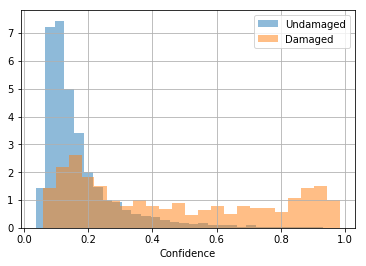

In [4]:
fig, ax = plt.subplots()
predictions.loc[predictions['label']==0, 'conscore'].hist(ax=ax, label='Undamaged', bins=30, normed=True, alpha=.5)
predictions.loc[predictions['label']==1, 'conscore'].hist(ax=ax, label='Damaged', bins=23, normed=True, alpha=.5)
ax.set_xlabel('Confidence')
plt.legend()
plt.show()

In [5]:
accuracy_score(y_true=predictions['label'], y_pred=(predictions['conscore']>0.5).astype(int))

0.912661075884639

Average precision-recall score: 0.52


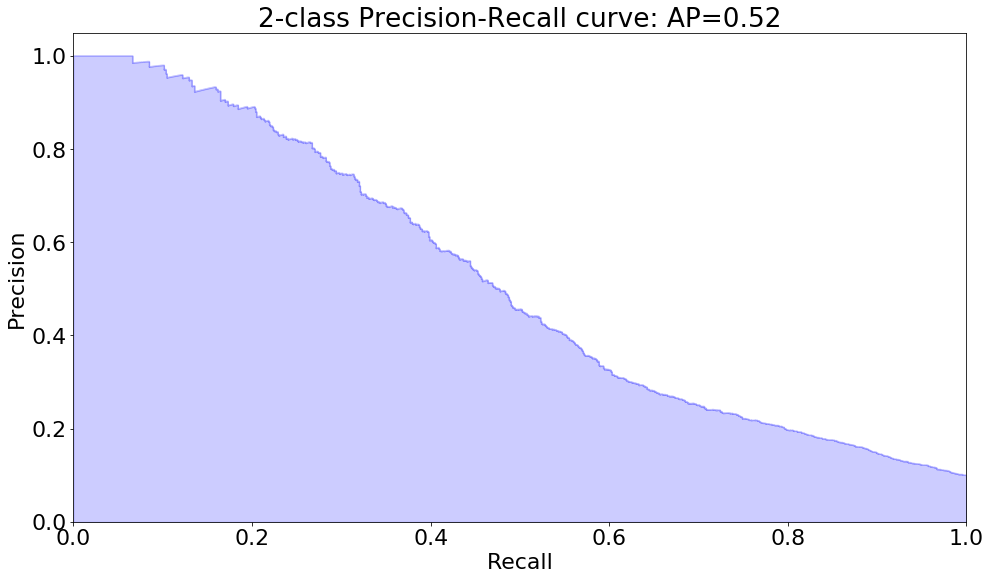

In [20]:
average_precision = average_precision_score(y_true=predictions['label'], y_score=predictions['conscore'])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(y_true=predictions['label'], probas_pred=predictions['conscore'])

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(figsize=(16,9))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [7]:
%matplotlib inline

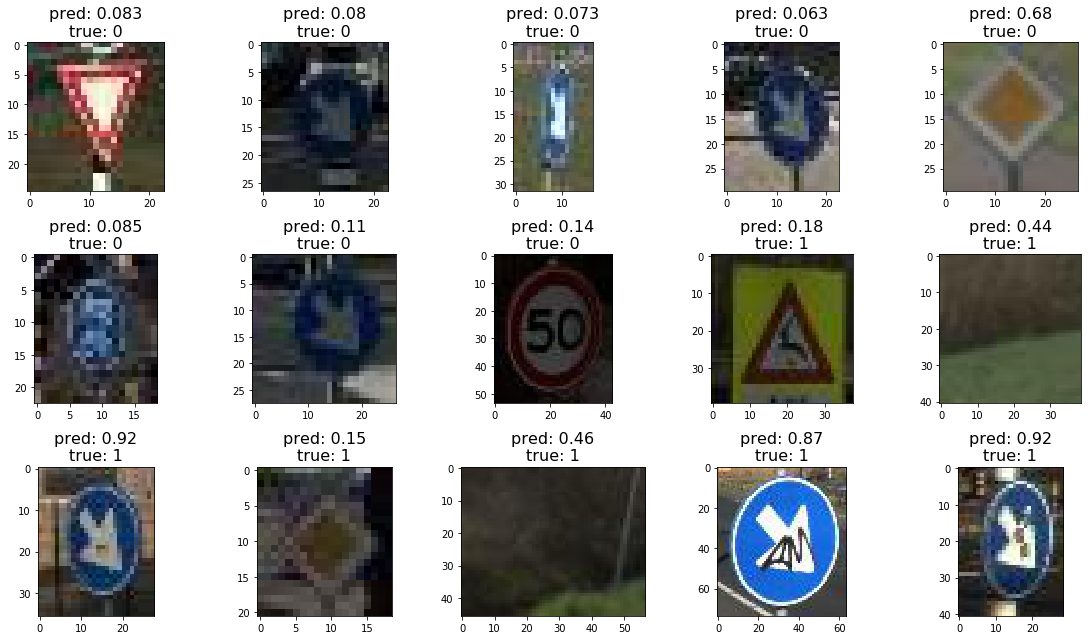

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(16,9))
# sample = predictions[(predictions['label']==1) & (predictions['conscore'] < .3)].sample(3*5)
sample = pd.concat((predictions[predictions['label']==0].sample(8), predictions[predictions['label']==1].sample(7)))
for i, ax in enumerate(axes.reshape(-1)):
    row = sample.iloc[i]
    img = Image.open(os.path.join('/home/jeroen/projects/traffic_signs/data/BAM_ZKIJ_20180518/cropped/images', row['filename']))
    ax.imshow(img)
    m = {0:'undamaged', 1:'damaged'}
    ax.set_title( 'pred: {:.2g}\ntrue: {}'.format(row['conscore'], row['label']), fontsize=16)
plt.tight_layout()
plt.show()

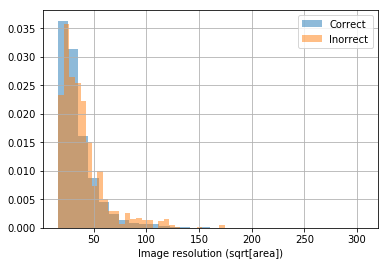

In [9]:
predictions['correct'] = (predictions['conscore']>.5)==predictions['label']
fig, ax = plt.subplots()
predictions.loc[ predictions['correct'], 'area'].apply(np.sqrt).hist(bins=30, normed=True, alpha=.5, label='Correct')
predictions.loc[~predictions['correct'], 'area'].apply(np.sqrt).hist(bins=30, normed=True, alpha=.5, label='Inorrect')
ax.set_xlabel('Image resolution (sqrt[area])')
plt.legend()
plt.show()

# Group by sequence

In [10]:
def mean_weighted_by_area(df):
    return np.average(df['conscore'], weights=df['area'])

In [11]:
y_pred = predictions.groupby(by='coordinates').apply(mean_weighted_by_area)

In [12]:
y_true = predictions.groupby(by='coordinates')['label'].mean()

In [13]:
accuracy_score(y_true, y_pred>.5)

0.9443561208267091

Average precision-recall score: 0.68


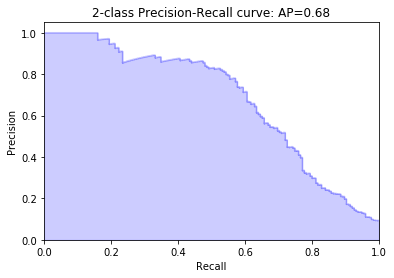

In [14]:
average_precision = average_precision_score(y_true, y_score=y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(y_true, probas_pred=y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [16]:
annotations['class'].value_counts()

undamaged     19811
graffity       1671
bent            627
crooked         480
scratched       226
dirty            94
swivelled        37
incomplete       31
faded            11
Name: class, dtype: int64

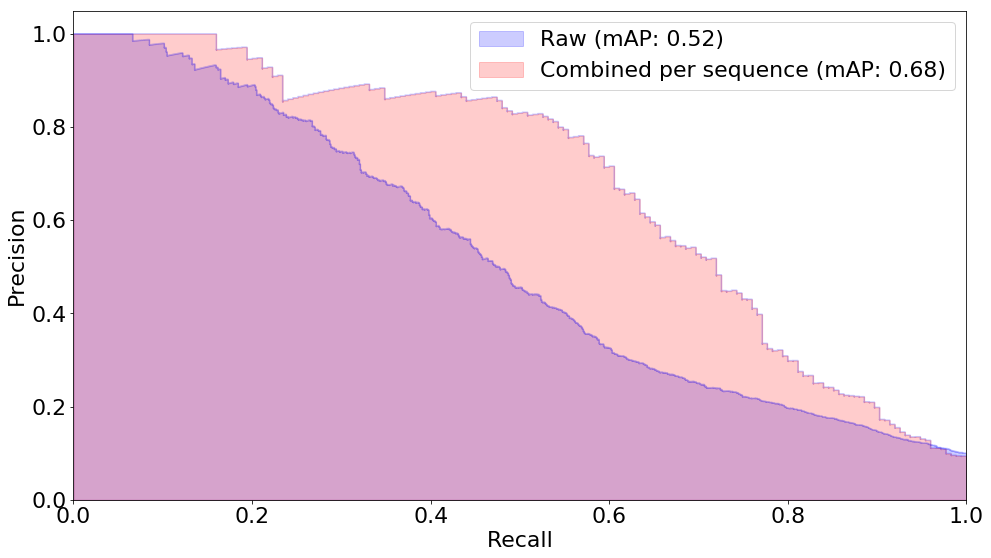

In [29]:
average_precision = average_precision_score(y_true=predictions['label'], y_score=predictions['conscore'])

precision, recall, _ = precision_recall_curve(y_true=predictions['label'], probas_pred=predictions['conscore'])

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(figsize=(16,9))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs, label='Raw (mAP: {:.02g})'.format(average_precision))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])



average_precision = average_precision_score(y_true, y_score=y_pred)

precision, recall, _ = precision_recall_curve(y_true, probas_pred=y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs, label='Combined per sequence (mAP: {:.02g})'.format(average_precision))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.legend()
plt.show()